In [9]:
import json
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [10]:
df = pd.read_csv('s_cities.csv',index_col = 'Unnamed: 0')

df = df.loc[~df.geocode.isin([3135050, 3143302, 1716109, 3304102, 3141405, 2905008, 29005008])]

#le = LabelEncoder().fit(df['region'])
#region_labels = le.classes_
#df['region_codes'] = le.transform(df['region'])
#df['region_codes'] = df['region_codes'].astype('category')

df.head()

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,ep_ini,ep_end,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik
8,2303501,Cascavel,2023,21.031014,0.447854,0.300026,1.492714,196.791047,0.330079,1.124154,202302,202339,37,23,CE,3,2017,2022,2016-10-01,2022-11-01
86,2311405,Quixeramobim,2023,18.372554,0.533369,0.303351,1.758256,466.403595,0.431255,0.930381,202302,202332,30,23,CE,3,2016,2022,2015-10-01,2022-11-01
88,2306801,Jaguaribara,2023,16.407407,0.744166,0.309970,2.400772,302.644966,0.583467,1.126158,202309,202325,16,23,CE,1,2017,2017,2016-10-01,2017-11-01
122,2305407,Icó,2023,13.682026,0.429828,0.300005,1.432734,87.125102,0.302034,1.434513,202302,202334,32,23,CE,2,2017,2022,2016-10-01,2022-11-01
152,2313203,Tamboril,2023,7.898419,0.938429,0.300000,3.128098,614.430188,0.680317,0.896101,202303,202314,11,23,CE,2,2016,2022,2015-10-01,2022-11-01


In [11]:
df.shape

(33, 20)

In [12]:
def get_score(geocode, label = 'RMSE_SS'): 
    
    f = open(f'../scores/lstm/scores_{geocode}_DL.json')

    s = json.load(f) 
    
    return s[label]['TL vs DL - dengue'], s[label]['TL vs DL - chik']

def process_row(row):
    ss_dengue, ss_chik  = get_score(geocode=row['geocode'])
    return pd.Series({'ss_lstm_dengue':ss_dengue, 'ss_lstm_chik': ss_chik})

# Aplicando a função a cada linha do DataFrame e atribuindo os resultados às novas colunas
df[['ss_lstm_dengue', 'ss_lstm_chik']] = df.apply(process_row, axis=1)

In [13]:
df.shape

(33, 22)

In [14]:
df.loc[(df.ss_lstm_dengue > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik
20,3127701,Governador Valadares,2023,16.839019,0.436746,0.300000,1.455820,771.985895,0.313102,1.971515,...,34,31,MG,3,2017,2022,2016-10-01,2022-11-01,0.660992,0.173131
76,2931350,Teixeira De Freitas,2023,19.688651,0.439971,0.308831,1.424632,699.205294,0.298064,1.314552,...,38,29,BA,5,2016,2022,2015-10-01,2022-11-01,0.456946,0.294969
9,1502400,Castanhal,2023,30.122658,0.409783,0.315752,1.297799,378.300682,0.229465,0.960755,...,43,15,PA,1,2018,2018,2017-10-01,2018-11-01,0.274579,0.143927
8,2303501,Cascavel,2023,21.031014,0.447854,0.300026,1.492714,196.791047,0.330079,1.124154,...,37,23,CE,3,2017,2022,2016-10-01,2022-11-01,0.162889,-0.310697
12,3168606,Teófilo Otoni,2023,8.986571,0.662300,0.300000,2.207668,3686.322491,0.547033,1.127227,...,17,31,MG,1,2017,2017,2016-10-01,2017-11-01,0.158676,0.140750
8,2112209,Timon,2023,9.563497,0.671844,0.300616,2.234891,228.744858,0.552551,0.640182,...,17,21,MA,1,2022,2022,2021-10-01,2022-11-01,0.110441,0.100093
37,3103504,Araguari,2023,17.341574,0.604659,0.304638,1.984842,668.922247,0.496182,0.975352,...,23,31,MG,1,2019,2019,2018-10-01,2019-11-01,0.095678,0.298035
10,2211001,Teresina,2023,15.140480,0.518897,0.300000,1.729656,2590.833511,0.421850,1.040220,...,27,22,PI,3,2016,2022,2015-10-01,2022-11-01,0.095396,-0.237179
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221800,0.471807,0.740548,...,26,31,MG,2,2017,2018,2016-10-01,2018-11-01,0.091045,0.146672
1,2205706,Luís Correia,2023,15.139235,1.231446,0.301210,4.088330,194.532019,0.755401,0.560586,...,8,22,PI,1,2017,2017,2016-10-01,2017-11-01,0.071456,0.131343


In [15]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik
20,3127701,Governador Valadares,2023,16.839019,0.436746,0.300000,1.455820,771.985895,0.313102,1.971515,...,34,31,MG,3,2017,2022,2016-10-01,2022-11-01,0.660992,0.173131
76,2931350,Teixeira De Freitas,2023,19.688651,0.439971,0.308831,1.424632,699.205294,0.298064,1.314552,...,38,29,BA,5,2016,2022,2015-10-01,2022-11-01,0.456946,0.294969
9,1502400,Castanhal,2023,30.122658,0.409783,0.315752,1.297799,378.300682,0.229465,0.960755,...,43,15,PA,1,2018,2018,2017-10-01,2018-11-01,0.274579,0.143927
12,3168606,Teófilo Otoni,2023,8.986571,0.662300,0.300000,2.207668,3686.322491,0.547033,1.127227,...,17,31,MG,1,2017,2017,2016-10-01,2017-11-01,0.158676,0.140750
8,2112209,Timon,2023,9.563497,0.671844,0.300616,2.234891,228.744858,0.552551,0.640182,...,17,21,MA,1,2022,2022,2021-10-01,2022-11-01,0.110441,0.100093
37,3103504,Araguari,2023,17.341574,0.604659,0.304638,1.984842,668.922247,0.496182,0.975352,...,23,31,MG,1,2019,2019,2018-10-01,2019-11-01,0.095678,0.298035
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221800,0.471807,0.740548,...,26,31,MG,2,2017,2018,2016-10-01,2018-11-01,0.091045,0.146672
1,2205706,Luís Correia,2023,15.139235,1.231446,0.301210,4.088330,194.532019,0.755401,0.560586,...,8,22,PI,1,2017,2017,2016-10-01,2017-11-01,0.071456,0.131343
40,3158953,Santana Do Paraíso,2023,19.173698,0.547676,0.308259,1.776676,356.426445,0.437151,1.336631,...,28,31,MG,1,2018,2018,2017-10-01,2018-11-01,0.056023,0.131783
86,2311405,Quixeramobim,2023,18.372554,0.533369,0.303351,1.758256,466.403595,0.431255,0.930381,...,30,23,CE,3,2016,2022,2015-10-01,2022-11-01,0.035531,0.171093


In [16]:
df.loc[(df.ss_lstm_chik > 0)]

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,ep_dur,uf,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik
86,2311405,Quixeramobim,2023,18.372554,0.533369,0.303351,1.758256,466.403595,0.431255,0.930381,...,30,23,CE,3,2016,2022,2015-10-01,2022-11-01,0.035531,0.171093
88,2306801,Jaguaribara,2023,16.407407,0.744166,0.309970,2.400772,302.644966,0.583467,1.126158,...,16,23,CE,1,2017,2017,2016-10-01,2017-11-01,0.029139,0.035417
122,2305407,Icó,2023,13.682026,0.429828,0.300005,1.432734,87.125102,0.302034,1.434513,...,32,23,CE,2,2017,2022,2016-10-01,2022-11-01,0.027760,0.044158
152,2313203,Tamboril,2023,7.898419,0.938429,0.300000,3.128098,614.430188,0.680317,0.896101,...,11,23,CE,2,2016,2022,2015-10-01,2022-11-01,0.001721,0.043448
8,2112209,Timon,2023,9.563497,0.671844,0.300616,2.234891,228.744858,0.552551,0.640182,...,17,21,MA,1,2022,2022,2021-10-01,2022-11-01,0.110441,0.100093
12,3168606,Teófilo Otoni,2023,8.986571,0.662300,0.300000,2.207668,3686.322491,0.547033,1.127227,...,17,31,MG,1,2017,2017,2016-10-01,2017-11-01,0.158676,0.140750
20,3127701,Governador Valadares,2023,16.839019,0.436746,0.300000,1.455820,771.985895,0.313102,1.971515,...,34,31,MG,3,2017,2022,2016-10-01,2022-11-01,0.660992,0.173131
37,3103504,Araguari,2023,17.341574,0.604659,0.304638,1.984842,668.922247,0.496182,0.975352,...,23,31,MG,1,2019,2019,2018-10-01,2019-11-01,0.095678,0.298035
40,3158953,Santana Do Paraíso,2023,19.173698,0.547676,0.308259,1.776676,356.426445,0.437151,1.336631,...,28,31,MG,1,2018,2018,2017-10-01,2018-11-01,0.056023,0.131783
65,3126703,Francisco Sá,2023,5.930634,0.744363,0.300377,2.478097,885.893148,0.596465,0.770337,...,12,31,MG,1,2022,2022,2021-10-01,2022-11-01,-0.005830,0.085738


In [17]:
def add_pop(df):
    
    '''
    This function add the population information of the city
    '''
    
    pop = pd.read_csv('./poptcu2010-2022_rgi.csv', sep=',')

    pop.CODMUN7 = pop.CODMUN7.astype(int)

    populacao = df.apply(lambda row: pop[pop.CODMUN7==row[0]][f"POP{str(int(row[2]))[-2:]}"].values[0] if int(str(int(row[2]))[-2:])<23 else pop[pop.CODMUN7==row[0]][f"POP22"].values[0] , axis=1).to_numpy().tolist()
    
    df['populacao'] = populacao

    return df

In [18]:
df = add_pop(df)
df['inc'] = 100000*df.total_cases/df.populacao
df.head()

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
8,2303501,Cascavel,2023,21.031014,0.447854,0.300026,1.492714,196.791047,0.330079,1.124154,...,CE,3,2017,2022,2016-10-01,2022-11-01,0.162889,-0.310697,70498,279.144156
86,2311405,Quixeramobim,2023,18.372554,0.533369,0.303351,1.758256,466.403595,0.431255,0.930381,...,CE,3,2016,2022,2015-10-01,2022-11-01,0.035531,0.171093,78502,594.129570
88,2306801,Jaguaribara,2023,16.407407,0.744166,0.309970,2.400772,302.644966,0.583467,1.126158,...,CE,1,2017,2017,2016-10-01,2017-11-01,0.029139,0.035417,10344,2925.802067
122,2305407,Icó,2023,13.682026,0.429828,0.300005,1.432734,87.125102,0.302034,1.434513,...,CE,2,2017,2022,2016-10-01,2022-11-01,0.027760,0.044158,62125,140.241613
152,2313203,Tamboril,2023,7.898419,0.938429,0.300000,3.128098,614.430188,0.680317,0.896101,...,CE,2,2016,2022,2015-10-01,2022-11-01,0.001721,0.043448,24812,2476.342850


In [19]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
20,3127701,Governador Valadares,2023,16.839019,0.436746,0.300000,1.455820,771.985895,0.313102,1.971515,...,MG,3,2017,2022,2016-10-01,2022-11-01,0.660992,0.173131,262499,294.090985
76,2931350,Teixeira De Freitas,2023,19.688651,0.439971,0.308831,1.424632,699.205294,0.298064,1.314552,...,BA,5,2016,2022,2015-10-01,2022-11-01,0.456946,0.294969,147454,474.185369
9,1502400,Castanhal,2023,30.122658,0.409783,0.315752,1.297799,378.300682,0.229465,0.960755,...,PA,1,2018,2018,2017-10-01,2018-11-01,0.274579,0.143927,200003,189.147504
12,3168606,Teófilo Otoni,2023,8.986571,0.662300,0.300000,2.207668,3686.322491,0.547033,1.127227,...,MG,1,2017,2017,2016-10-01,2017-11-01,0.158676,0.140750,142030,2595.453419
8,2112209,Timon,2023,9.563497,0.671844,0.300616,2.234891,228.744858,0.552551,0.640182,...,MA,1,2022,2022,2021-10-01,2022-11-01,0.110441,0.100093,175044,130.678491
37,3103504,Araguari,2023,17.341574,0.604659,0.304638,1.984842,668.922247,0.496182,0.975352,...,MG,1,2019,2019,2018-10-01,2019-11-01,0.095678,0.298035,121424,550.897885
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221800,0.471807,0.740548,...,MG,2,2017,2018,2016-10-01,2018-11-01,0.091045,0.146672,211094,3122.410774
1,2205706,Luís Correia,2023,15.139235,1.231446,0.301210,4.088330,194.532019,0.755401,0.560586,...,PI,1,2017,2017,2016-10-01,2017-11-01,0.071456,0.131343,30701,633.634146
40,3158953,Santana Do Paraíso,2023,19.173698,0.547676,0.308259,1.776676,356.426445,0.437151,1.336631,...,MG,1,2018,2018,2017-10-01,2018-11-01,0.056023,0.131783,37113,960.381660
86,2311405,Quixeramobim,2023,18.372554,0.533369,0.303351,1.758256,466.403595,0.431255,0.930381,...,CE,3,2016,2022,2015-10-01,2022-11-01,0.035531,0.171093,78502,594.129570


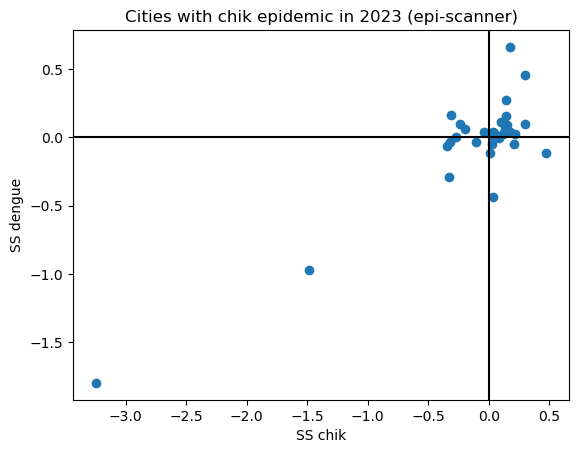

In [20]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue)

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.savefig('scatter_comp_all.png', dpi = 300)
plt.show()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_11032/1709593016.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.n_last_ep, cmap = cm.get_cmap('tab10', 5))


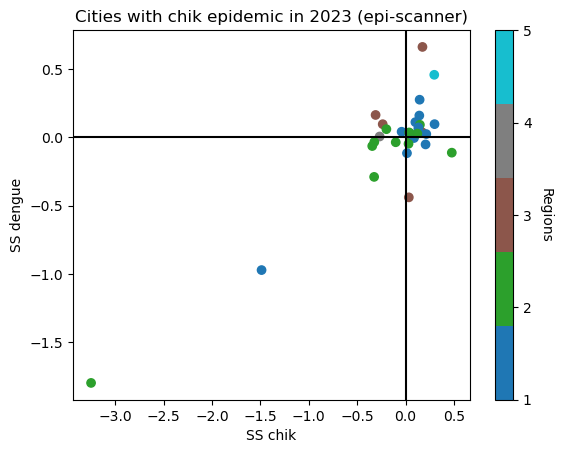

In [21]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.n_last_ep, cmap = cm.get_cmap('tab10', 5))

cbar = plt.colorbar()
cbar.set_ticks(np.arange(1,6))
#cbar.set_ticklabels(region_labels)

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('Regions', rotation=270, labelpad=15)


ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.savefig('scatter_comp_all_1.png', dpi = 300)

plt.show()

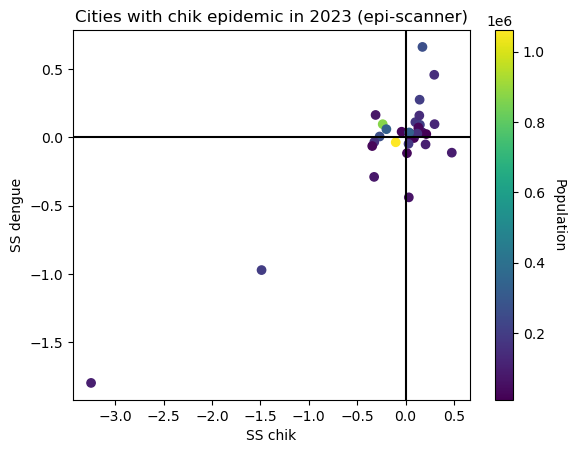

In [22]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.populacao) 

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('Population', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_2.png', dpi = 300)

plt.show()

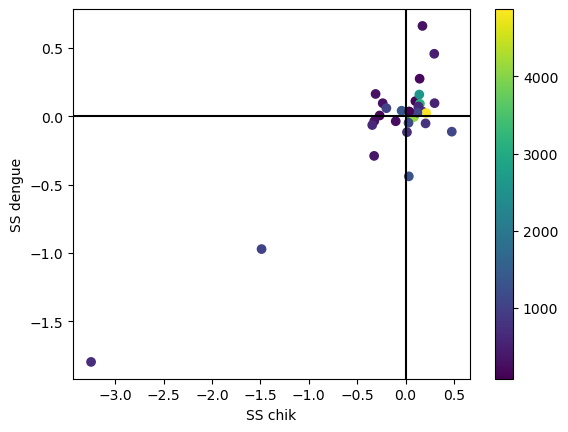

In [23]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.inc)

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_11032/1222382377.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))


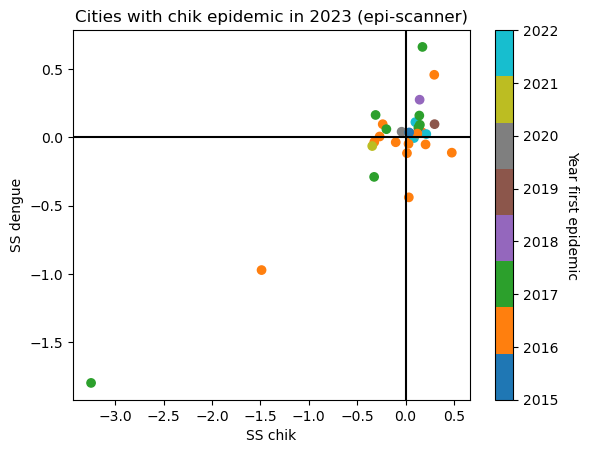

In [24]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('Year first epidemic', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_3.png', dpi = 300)

plt.show()

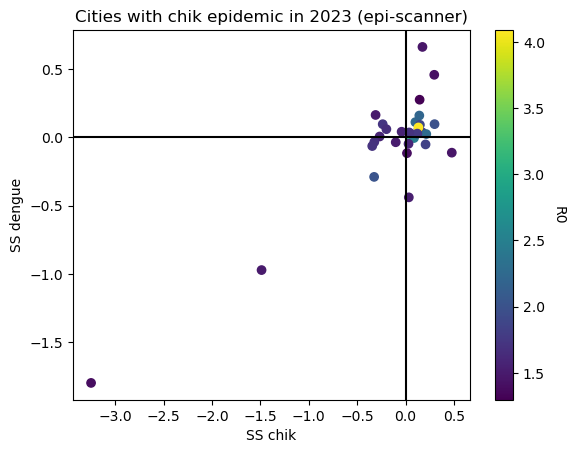

In [25]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.R0)

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('R0', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_4.png', dpi = 300)

plt.show()

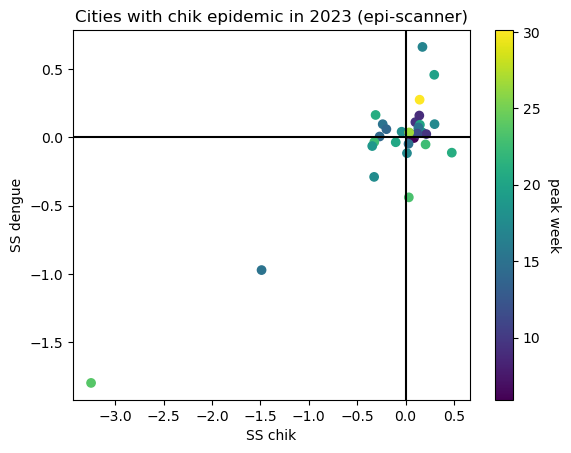

In [26]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.peak_week)

cbar = plt.colorbar()

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

ax.set_title('Cities with chik epidemic in 2023 (epi-scanner)')
cbar.set_label('peak week', rotation=270, labelpad=15)

plt.savefig('scatter_comp_all_5.png', dpi = 300)

plt.show()

In [27]:
df.shape

(33, 24)

In [28]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)]

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
86,2311405,Quixeramobim,2023,18.372554,0.533369,0.303351,1.758256,466.403595,0.431255,0.930381,...,CE,3,2016,2022,2015-10-01,2022-11-01,0.035531,0.171093,78502,594.129570
88,2306801,Jaguaribara,2023,16.407407,0.744166,0.309970,2.400772,302.644966,0.583467,1.126158,...,CE,1,2017,2017,2016-10-01,2017-11-01,0.029139,0.035417,10344,2925.802067
122,2305407,Icó,2023,13.682026,0.429828,0.300005,1.432734,87.125102,0.302034,1.434513,...,CE,2,2017,2022,2016-10-01,2022-11-01,0.027760,0.044158,62125,140.241613
152,2313203,Tamboril,2023,7.898419,0.938429,0.300000,3.128098,614.430188,0.680317,0.896101,...,CE,2,2016,2022,2015-10-01,2022-11-01,0.001721,0.043448,24812,2476.342850
8,2112209,Timon,2023,9.563497,0.671844,0.300616,2.234891,228.744858,0.552551,0.640182,...,MA,1,2022,2022,2021-10-01,2022-11-01,0.110441,0.100093,175044,130.678491
12,3168606,Teófilo Otoni,2023,8.986571,0.662300,0.300000,2.207668,3686.322491,0.547033,1.127227,...,MG,1,2017,2017,2016-10-01,2017-11-01,0.158676,0.140750,142030,2595.453419
20,3127701,Governador Valadares,2023,16.839019,0.436746,0.300000,1.455820,771.985895,0.313102,1.971515,...,MG,3,2017,2022,2016-10-01,2022-11-01,0.660992,0.173131,262499,294.090985
37,3103504,Araguari,2023,17.341574,0.604659,0.304638,1.984842,668.922247,0.496182,0.975352,...,MG,1,2019,2019,2018-10-01,2019-11-01,0.095678,0.298035,121424,550.897885
40,3158953,Santana Do Paraíso,2023,19.173698,0.547676,0.308259,1.776676,356.426445,0.437151,1.336631,...,MG,1,2018,2018,2017-10-01,2018-11-01,0.056023,0.131783,37113,960.381660
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221800,0.471807,0.740548,...,MG,2,2017,2018,2016-10-01,2018-11-01,0.091045,0.146672,211094,3122.410774


In [29]:
df.loc[(df.ss_lstm_dengue > 0) & (df.ss_lstm_chik > 0)].populacao.describe()

count        16.000000
mean     125481.875000
std       96235.538991
min       10344.000000
25%       35510.000000
50%      131727.000000
75%      181283.750000
max      334195.000000
Name: populacao, dtype: float64

In [30]:
df.loc[(df.ss_lstm_dengue <= 0) | (df.ss_lstm_chik <= 0)].populacao.describe()

count    1.700000e+01
mean     2.171125e+05
std      2.966884e+05
min      2.150400e+04
25%      6.477100e+04
50%      9.662100e+04
75%      1.971630e+05
max      1.061374e+06
Name: populacao, dtype: float64

In [31]:
df_p = df.loc[df.populacao > 100000]

In [32]:
df_p.shape

(17, 24)

In [33]:
df_p.loc[df_p.ss_lstm_dengue > 0].shape

(12, 24)

In [34]:
df_p.loc[df_p.ss_lstm_chik > 0].shape

(11, 24)

In [35]:
df_p.loc[(df_p.ss_lstm_dengue > 0) & (df_p.ss_lstm_chik > 0)].sort_values(by = 'ss_lstm_dengue', ascending = False)

,geocode,muni_name,year,peak_week,beta,gamma,R0,total_cases,alpha,sum_res,...,state,n_last_ep,year_first_ep,year_last_ep_before_2023,start_train_chik,end_train_chik,ss_lstm_dengue,ss_lstm_chik,populacao,inc
20,3127701,Governador Valadares,2023,16.839019,0.436746,0.300000,1.455820,771.985895,0.313102,1.971515,...,MG,3,2017,2022,2016-10-01,2022-11-01,0.660992,0.173131,262499,294.090985
76,2931350,Teixeira De Freitas,2023,19.688651,0.439971,0.308831,1.424632,699.205294,0.298064,1.314552,...,BA,5,2016,2022,2015-10-01,2022-11-01,0.456946,0.294969,147454,474.185369
9,1502400,Castanhal,2023,30.122658,0.409783,0.315752,1.297799,378.300682,0.229465,0.960755,...,PA,1,2018,2018,2017-10-01,2018-11-01,0.274579,0.143927,200003,189.147504
12,3168606,Teófilo Otoni,2023,8.986571,0.662300,0.300000,2.207668,3686.322491,0.547033,1.127227,...,MG,1,2017,2017,2016-10-01,2017-11-01,0.158676,0.140750,142030,2595.453419
8,2112209,Timon,2023,9.563497,0.671844,0.300616,2.234891,228.744858,0.552551,0.640182,...,MA,1,2022,2022,2021-10-01,2022-11-01,0.110441,0.100093,175044,130.678491
37,3103504,Araguari,2023,17.341574,0.604659,0.304638,1.984842,668.922247,0.496182,0.975352,...,MG,1,2019,2019,2018-10-01,2019-11-01,0.095678,0.298035,121424,550.897885
96,3131307,Ipatinga,2023,20.110780,0.567974,0.300000,1.893246,6591.221800,0.471807,0.740548,...,MG,2,2017,2018,2016-10-01,2018-11-01,0.091045,0.146672,211094,3122.410774
158,2905701,Camaçari,2023,26.618691,0.520438,0.304415,1.709636,267.074216,0.415080,1.499041,...,BA,2,2015,2019,2014-10-01,2019-11-01,0.034888,0.035759,334195,79.915683
84,2925303,Porto Seguro,2023,11.522623,0.528173,0.300000,1.760578,1695.361806,0.432005,1.113874,...,BA,2,2016,2017,2015-10-01,2017-11-01,0.026440,0.120249,158736,1068.038634


In [36]:
df_p.geocode.values

array([2112209, 2111300, 3168606, 3127701, 3103504, 3131307, 2408003,
       2211001, 2207702, 1502400, 1721000, 2928703, 2914802, 2931350,
       2925303, 2913606, 2905701])

In [37]:
df = df_p

/var/folders/ch/kxpr39wx44v97968yr_4hmch0000gn/T/ipykernel_9539/3705494107.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))


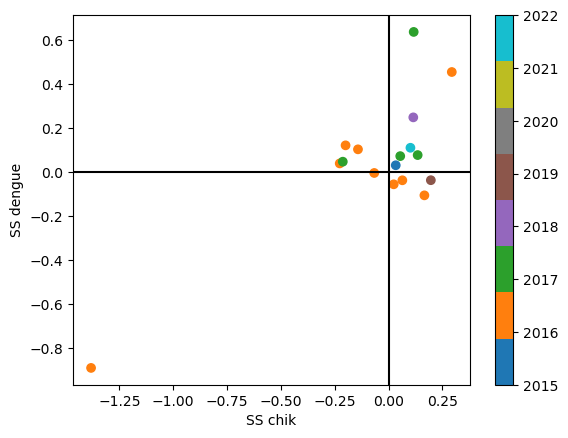

In [46]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.year_first_ep, cmap = cm.get_cmap('tab10', 8))

cbar = plt.colorbar()
#cbar.set_ticks(np.arange(1,6))
#cbar.set_ticklabels(region_labels)

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

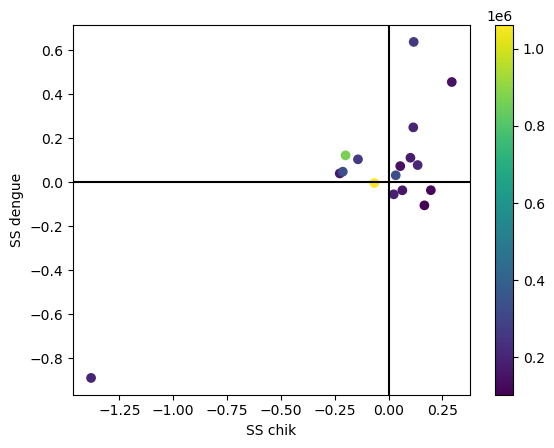

In [47]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.populacao) 

cbar = plt.colorbar()

#cbar.set_ticklabels(region_labels)

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

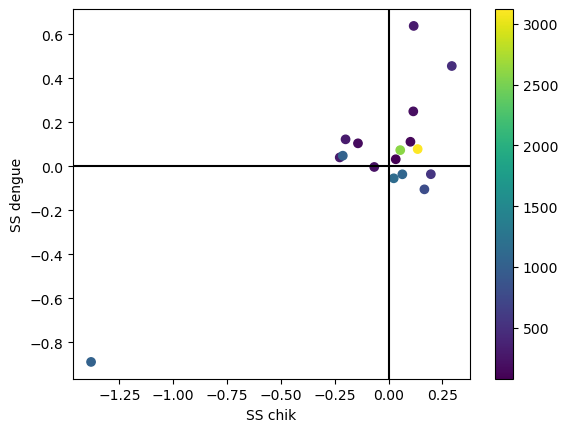

In [48]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue, c = df.inc) 

cbar = plt.colorbar()
#cbar.set_ticklabels(region_labels)

ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.show()

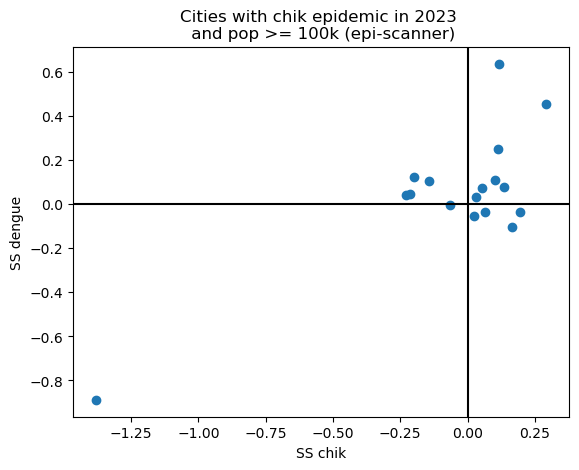

In [49]:
fig, ax = plt.subplots()

plt.scatter(df.ss_lstm_chik, df.ss_lstm_dengue)

ax.set_title('Cities with chik epidemic in 2023 \n and pop >= 100k (epi-scanner)')
ax.set_xlabel('SS chik')
ax.set_ylabel('SS dengue')

ax.axvline(0, color = 'black')
ax.axhline(0, color = 'black')

plt.savefig('scatter_comp_all_pop_100k.png', dpi = 300)
plt.show()

In [50]:
df_p.shape

(17, 24)